In [1]:
import cv2
import pywt
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage import img_as_float

In [2]:
def load_images_from_folder(path=None, img_width=224, img_height=224):
    try:
        images = []
        for filename in os.listdir(path):
            file_path = os.path.join(path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)

        return np.array(images)
    except Exception as e:
        print(f"Error has occurred during data loading: {e}")

In [13]:
train_n_dir = "/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/train/NORMAL"
train_p_dir = "/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/train/PNEUMONIA"
val_n_dir = "/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/val/NORMAL"
val_p_dir = "/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/val/PNEUMONIA"
test_n_dir = "/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/test/NORMAL"
test_p_dir = "/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/test/PNEUMONIA"


train_n_img = load_images_from_folder(train_n_dir)
train_p_img = load_images_from_folder(train_p_dir)

val_n_img = load_images_from_folder(val_n_dir)
val_p_img = load_images_from_folder(val_p_dir)

test_n_img = load_images_from_folder(test_n_dir)
test_p_img = load_images_from_folder(test_p_dir)

In [14]:
def wavelet_denoise(image, wavelet='db4', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)

In [15]:
def denoise_images(images):
    denoised_images = []
    for image in images:
        denoised_image = wavelet_denoise(image)
        denoised_images.append(denoised_image)
    return denoised_images

In [16]:
# apply denoise
denoised_train_input0 = denoise_images(train_n_img)
denoised_train_input1 = denoise_images(train_p_img)

denoised_val_input0 = denoise_images(val_n_img)
denoised_val_input1 = denoise_images(val_p_img)

denoised_test_input0 = denoise_images(test_n_img)
denoised_test_input1 = denoise_images(test_p_img)

/apps/local/shared/CV701_Fall23/CV701_env/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 100 is too high: all coefficients will experience boundary effects.
  warnings.warn(


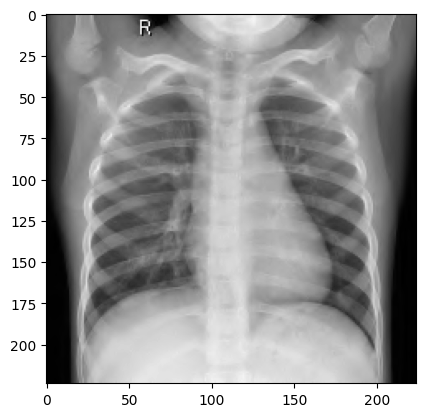

In [20]:
plt.imshow(denoised_train_input0[0], cmap='gray')

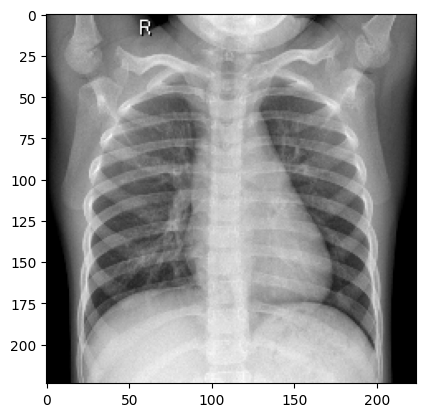

In [21]:
plt.imshow(train_n_img[0], cmap='gray')

In [9]:
def save_denoised_images(images, directory, base_filename):
    os.makedirs(directory, exist_ok=True)
    
    for i, img in enumerate(images):
        img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        img_uint8 = np.uint8(img_normalized)

        cv2.imwrite(f'{directory}/{base_filename}_{i}.png', img_uint8)

In [10]:
"""save_denoised_images(denoised_train_input0, "/l/users/khalil.alblooshi/wavelet_dataset/train/NORMAL/", 'denoised_train_input')
save_denoised_images(denoised_train_input1, "/l/users/khalil.alblooshi/wavelet_dataset/train/PNEUMONIA/", 'denoised_train_input')

save_denoised_images(denoised_val_input0, '/l/users/khalil.alblooshi/wavelet_dataset/val/NORMAL/', 'denoised_val_input')
save_denoised_images(denoised_val_input1, '/l/users/khalil.alblooshi/wavelet_dataset/val/PNEUMONIA/', 'denoised_val_input')

save_denoised_images(denoised_test_input0, '/l/users/khalil.alblooshi/wavelet_dataset/test/NORMAL/', 'denoised_test_input')
save_denoised_images(denoised_test_input1, '/l/users/khalil.alblooshi/wavelet_dataset/test/PNEUMONIA/', 'denoised_test_input')"""

'save_denoised_images(denoised_train_input0, "/l/users/khalil.alblooshi/wavelet_dataset/train/NORMAL/", \'denoised_train_input\')\nsave_denoised_images(denoised_train_input1, "/l/users/khalil.alblooshi/wavelet_dataset/train/PNEUMONIA/", \'denoised_train_input\')\n\nsave_denoised_images(denoised_val_input0, \'/l/users/khalil.alblooshi/wavelet_dataset/val/NORMAL/\', \'denoised_val_input\')\nsave_denoised_images(denoised_val_input1, \'/l/users/khalil.alblooshi/wavelet_dataset/val/PNEUMONIA/\', \'denoised_val_input\')\n\nsave_denoised_images(denoised_test_input0, \'/l/users/khalil.alblooshi/wavelet_dataset/test/NORMAL/\', \'denoised_test_input\')\nsave_denoised_images(denoised_test_input1, \'/l/users/khalil.alblooshi/wavelet_dataset/test/PNEUMONIA/\', \'denoised_test_input\')'

_________________________________________ Experiment ground_________________________________________ 

In [13]:
def wavelet_denoise_db4(image, wavelet='db4', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)


def wavelet_denoise_sym3(image, wavelet='sym3', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)


def wavelet_denoise_bior13(image, wavelet='bior1.3', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)



In [21]:
original = val_n_img[7]
db1 = wavelet_denoise(val_n_img[7])
db4 = wavelet_denoise_db4(val_n_img[7])
sym3 = wavelet_denoise_sym3(val_n_img[7])
bior13 = wavelet_denoise_bior13(val_n_img[7])

/home/khalil.alblooshi/anaconda3/envs/ai701/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 100 is too high: all coefficients will experience boundary effects.
  warnings.warn(


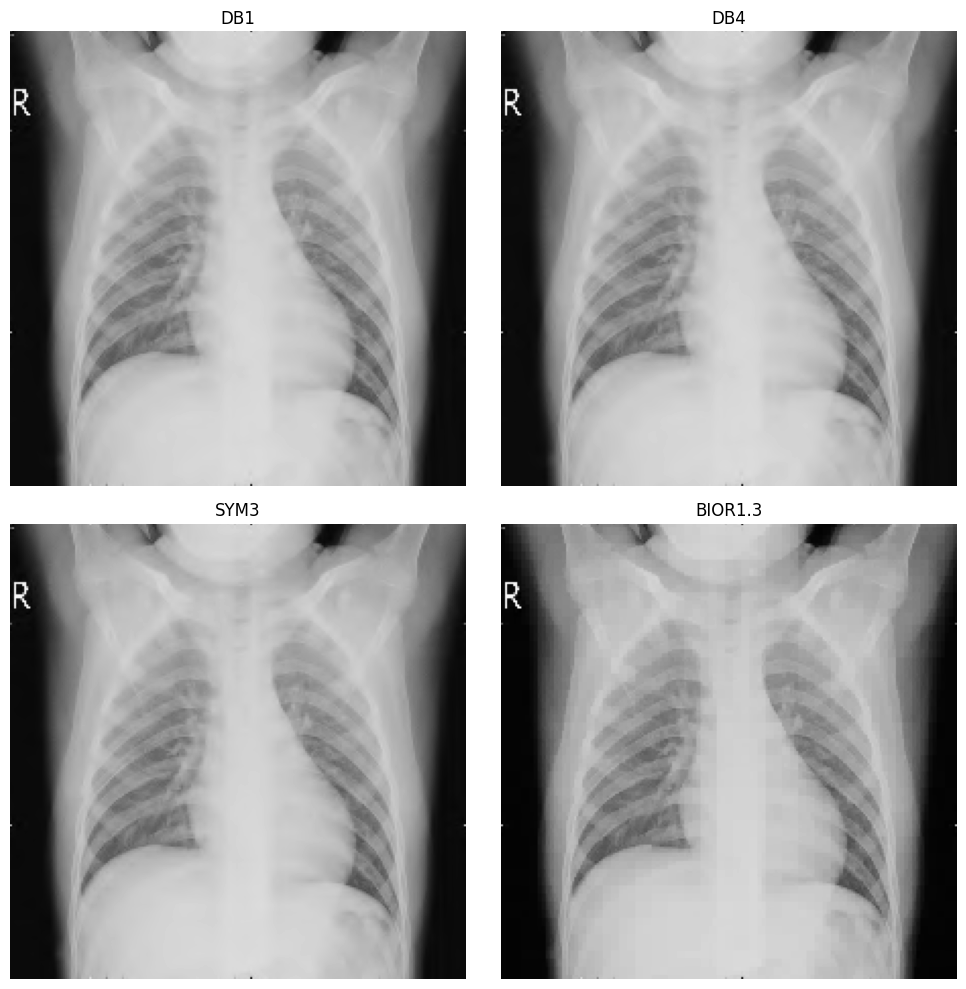

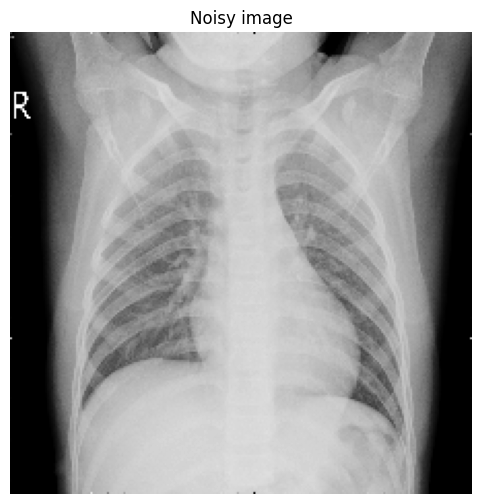

In [22]:
import matplotlib.pyplot as plt

# Assuming db1, db4, sym3, bior13, and fifth_image are your images
# Ensure these are numpy arrays and in a format suitable for display

# First plot with 2x2 grid for the first four images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the size as needed

# Plot each of the first four images in a subplot
axs[0, 0].imshow(db1, cmap='gray')
axs[0, 0].set_title('DB1')
axs[0, 0].axis('off')

axs[0, 1].imshow(db4, cmap='gray')
axs[0, 1].set_title('DB4')
axs[0, 1].axis('off')

axs[1, 0].imshow(sym3, cmap='gray')
axs[1, 0].set_title('SYM3')
axs[1, 0].axis('off')

axs[1, 1].imshow(bior13, cmap='gray')
axs[1, 1].set_title('BIOR1.3')
axs[1, 1].axis('off')

plt.tight_layout()  # Adjust the layout
plt.show()

# Separate figure for the fifth image
plt.figure(figsize=(6, 6))  # Adjust the size as needed
plt.imshow(original, cmap='gray')  # Replace 'fifth_image' with your actual fifth image variable
plt.title('Noisy image')
plt.axis('off')
plt.show()


Considering db4 as it seem to produce better denoising results than that of the others.

______________________________________________________________________Denoising evaluation ______________________________________________________________________

SSIM is a measure of similarity between two images (1: perfect similarity, 0 no similarity, -1 perfect anti correlation)

In [29]:
denoised_train_input0 = np.uint8(denoised_train_input0)
denoised_train_input1 = np.uint8(denoised_train_input1)

denoised_val_input0 = np.uint8(denoised_val_input0)
denoised_val_input1 = np.uint8(denoised_val_input1)

denoised_test_input0 = np.uint8(denoised_test_input0)
denoised_test_input1 = np.uint8(denoised_test_input1)

In [2]:
# Load the images
wavelet_image = cv2.imread('/home/branislava.jankovic/Desktop/denoising-pneumonia/wavelet_dataset/val/NORMAL/denoised_val_input_7.png')
wavelet_image = cv2.resize(wavelet_image, (224, 224))
original_image = cv2.imread('/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg')
original_image = cv2.resize(original_image, (224, 224))

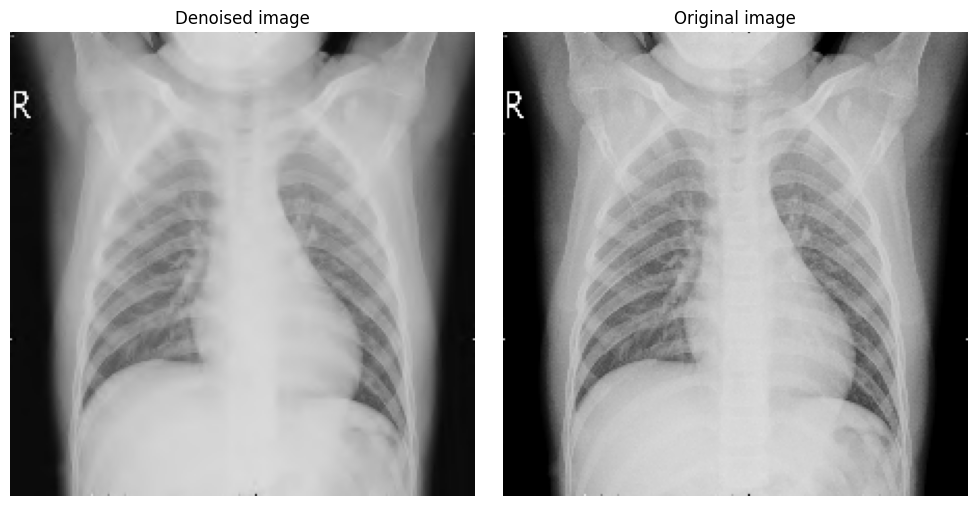

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Display the first image on the left subplot
axes[0].imshow(wavelet_image, cmap='gray')
axes[0].set_title('Denoised image')

# Display the second image on the right subplot
axes[1].imshow(original_image, cmap='gray')
axes[1].set_title('Original image')

# Hide the axis labels
for ax in axes:
    ax.axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [5]:
from skimage.metrics import structural_similarity as ssim

ssim_value = ssim(original_image, wavelet_image, win_size=3, multichannel=True)
print("SSIM for one picture:", ssim_value)

SSIM for one picture: 0.83417398317012


In [3]:
def calculate_average_ssim(noisy_images, denoised_images):
    if len(noisy_images) != len(denoised_images):
        raise ValueError("The number of noisy and denoised images must be the same")

    total_ssim = 0.0
    for noisy, denoised in zip(noisy_images, denoised_images):
        # Ensure the images have the same shape
        if noisy.shape != denoised.shape:
            # Resize or adjust as necessary
            raise ValueError("The size of noisy and denoised images must be the same")

        ssim_value = ssim(noisy, denoised, multichannel=True)
        total_ssim += ssim_value

    average_ssim = total_ssim / len(noisy_images)
    return average_ssim

In [32]:
# without loading dataset
average_ssim_train_n = calculate_average_ssim(train_n_img, denoised_train_input0)
average_ssim_train_p = calculate_average_ssim(train_p_img, denoised_train_input1)

average_ssim_val_n = calculate_average_ssim(val_n_img, denoised_val_input0)
average_ssim_val_p = calculate_average_ssim(val_p_img, denoised_val_input1)

average_ssim_test_n = calculate_average_ssim(test_n_img, denoised_test_input0)
average_ssim_test_p = calculate_average_ssim(test_p_img, denoised_test_input1)

print("Average SSIM Train Normal:", average_ssim_train_n)
print("Average SSIM Train Pneumonia:", average_ssim_train_p)

print("Average SSIM val Normal:", average_ssim_val_n)
print("Average SSIM val Pneumonia:", average_ssim_val_p)

print("Average SSIM test Normal:", average_ssim_test_n)
print("Average SSIM test Pneumonia:", average_ssim_test_p)

Average SSIM Train Normal: 0.9133888090467407
Average SSIM Train Pneumonia: 0.9309770337056744
Average SSIM val Normal: 0.9136730821736149
Average SSIM val Pneumonia: 0.9246843387958836
Average SSIM test Normal: 0.9261864421804339
Average SSIM test Pneumonia: 0.9323418768089604


The PSNR (Peack Signal to Noise Ratio) is another effective method usually used to measure the change between the original image and its compressed version. It is also useful to use in measuring the effectiveness of reconstructting noisy images to reduce its noise.

$$\text{PSNR} = 10 \cdot \log_{10} \left( \frac{\text{MAX}^2}{\text{MSE}} \right)$$


In [35]:
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_average_psnr(noisy_images, denoised_images):
    total_psnr = 0.0
    for noisy, denoised in zip(noisy_images, denoised_images):
        if noisy.shape != denoised.shape:
            raise ValueError("The size of noisy and denoised images must be the same")

        psnr_value = calculate_psnr(noisy, denoised)
        total_psnr += psnr_value

    average_psnr = total_psnr / len(noisy_images)
    return average_psnr


In [36]:
one_image = calculate_psnr(original_image, wavelet_image)

average_psnr_train_n = calculate_average_psnr(train_n_img, denoised_train_input0)
average_psnr_train_p = calculate_average_psnr(train_p_img, denoised_train_input1)
average_psnr_val_n = calculate_average_psnr(val_n_img, denoised_val_input0)
average_psnr_val_p = calculate_average_psnr(val_p_img, denoised_val_input1)
average_psnr_test_n = calculate_average_psnr(test_n_img, denoised_test_input0)
average_psnr_test_p = calculate_average_psnr(test_p_img, denoised_test_input1)

In [37]:
# without loading dataset
print("Average PSNR Values:")
print()
print(f"  - The first noisy image and its denoised version: {one_image:.2f} dB")
print()
print(f"  - Train Normal: {average_psnr_train_n:.2f} dB")
print(f"  - Train Pneumonia: {average_psnr_train_p:.2f} dB")
print(f"  - Validation Normal: {average_psnr_val_n:.2f} dB")
print(f"  - Validation Pneumonia: {average_psnr_val_p:.2f} dB")
print(f"  - Test Normal: {average_psnr_test_n:.2f} dB")
print(f"  - Test Pneumonia: {average_psnr_test_p:.2f} dB")

Average PSNR Values:

  - The first noisy image and its denoised version: 32.65 dB

  - Train Normal: 36.62 dB
  - Train Pneumonia: 37.96 dB
  - Validation Normal: 37.40 dB
  - Validation Pneumonia: 38.04 dB
  - Test Normal: 36.93 dB
  - Test Pneumonia: 38.00 dB


 A higher PSNR indicates that the reconstruction or denoising process has preserved more of the original image's details. So the noise level is lower in comparison to the signal strength.

The interpretation of PSNR values can be subjective and depends on the context and the specific application. For example, in some applications, a PSNR of 30 dB might be considered good quality, while in others, a higher PSNR might be required.

For images, a PSNR value of:

    Below 20 dB is considered poor quality.
    Between 20 dB and 30 dB is acceptable to good.
    Above 30 dB is generally considered high quality.
    Above 40 dB is often indistinguishable from the original image.

Usage in Denoising: In image denoising, a higher PSNR value usually indicates that the denoising algorithm has effectively reduced noise while preserving important image details.